In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn.decomposition import PCA

In [2]:
#features to pca
to_pca = ['roof_material_fiber_cement', 'roof_material_metal',
       'roof_material_natural_fibers_roof', 'roof_material_other_roof',
       'elec_provider_cooperative', 'elec_provider_none_electricity',
       'elec_provider_private_plant', 'elec_provider_public',
       'wall_material_block_brick', 'wall_material_natural_fibers',
       'wall_material_other_wall', 'wall_material_prefabricated_cement',
       'wall_material_waste_material', 'wall_material_wood',
       'wall_material_wood_zinc_absbesto', 'wall_material_zink',
       'house_ownership_other_house', 'house_ownership_own',
       'house_ownership_own_installments', 'house_ownership_precarious',
       'house_ownership_rented', 'region_brunca', 'region_central',
       'region_chorotega', 'region_huetar_atlantic', 'region_huetar_norte',
       'region_pacific_central', 'water_supply_inside',
       'water_supply_outside', 'water_supply_water_none',
       'cooking_supply_charcoal', 'cooking_supply_electricity',
       'cooking_supply_energy_none', 'cooking_supply_gas',
       'floor_material_cement', 'floor_material_natural_material_floor',
       'floor_material_none_floor', 'floor_material_other_floor',
       'floor_material_tile', 'floor_material_wood_floor',
       'sewage_letrine', 'sewage_no_toilet', 'sewage_other_sewage',
       'sewage_septic_tank', 'sewage_sewer_cesspool',
       'thrash_disposal_burning', 'thrash_disposal_hollow_buried',
       'thrash_disposal_other_disposal', 'thrash_disposal_tanker truck',
       'thrash_disposal_throwing_space']

In [3]:
df = pd.read_csv('clean_income.csv')

In [4]:
#1 check for null data
np.sum(df.isnull().sum())

0

In [5]:
#2 drop duplicate values
print(df.duplicated().value_counts())
df.drop_duplicates(inplace = True)

False    9516
True       18
dtype: int64


In [6]:
#3 split train, test
x_train, x_test, y_train, y_test = train_test_split(df.drop('Target', axis = 1), df.Target, test_size = .2)

In [7]:
#4 Fit PCA, 7 components determined experimentally.
pca_train = x_train[to_pca]
pca_test = x_test[to_pca]
pca = PCA(n_components = 13)#7
train_idx = pca_train.index.values
test_idx = pca_test.index.values
train_pcas = pd.DataFrame(pca.fit_transform(pca_train), index = train_idx)
test_pcas = pd.DataFrame(pca.transform(pca_test), index = test_idx)
print(np.sum(pca.explained_variance_ratio_))


0.845137821905


In [8]:
#5 Drop pca build features, concatenate new features.
x_train.drop(to_pca, axis = 1, inplace = True)
x_test.drop(to_pca, axis = 1, inplace = True)
x_train = pd.concat([x_train, train_pcas], axis = 1)
x_test = pd.concat([x_test, test_pcas], axis = 1)

In [9]:
#6 Fit Random Forest Model. Accuracy score is relatively high.
weights = {1 : 15, 2 : 5, 3 : 10, 4 : 1}
model = RandomForestClassifier(criterion= 'entropy', min_samples_split= 2, max_depth = 20,
                                min_samples_leaf = 2, n_estimators = 60, class_weight = weights) 

model.fit(x_train, y_train)
    
preds = model.predict(x_test)
score = accuracy_score(y_test, preds)
score

0.96218487394957986

In [10]:
#7 print confusion matrix
cm = confusion_matrix(y_test, preds)
cm

array([[ 149,    4,    0,    6],
       [   3,  298,    7,   23],
       [   0,    3,  208,    6],
       [   3,    4,   13, 1177]])

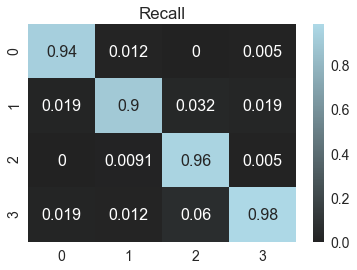

In [11]:
#8 cm visually
value_counts = y_test.value_counts()
df_cm = pd.DataFrame(confusion_matrix(y_test, preds), range(4), range(4))
df_cm = df_cm.divide([value_counts.loc[1], value_counts.loc[2], value_counts.loc[3], value_counts.loc[4]])
sn.set(font_scale=1.4) 
cmap = sn.dark_palette("lightblue", as_cmap=True)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap = cmap) 
plt.title('Recall')
plt.show()

In [12]:
#9 f1 scores
f1_score(y_test, preds, average=None)

array([ 0.94904459,  0.93125   ,  0.93483146,  0.97716895])